In [1]:
import sys
import pandas as pd
import numpy as np
# conda install -c conda-forge matplotlib-base
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set()  # Plot using the seaborn style

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" )
print( f"Seaborn {sns.__version__}" )

#load data set
df =pd.read_excel('1882022.xlsx')
#Trim dataframe
df = df.iloc[6:774,4:17].reset_index(drop = True)
df = df.drop(labels = 'Unnamed: 11', axis =1)
df


Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3
Seaborn 0.11.2


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ENERG,PTT,0.580548,38847751,1.37,24578664.0,0.86,0.126865,64418694,2.26,57166277.0,2
1,ENERG,TOP,10.931607,25326935,12.41,2122676.0,1.04,4.929509,32509603,15.94,5482680.0,2.69
2,ENERG,PTTEP,1.885306,20599944,5.28,7139604.0,1.78,0.666497,31118967,7.92,18673286.0,4.66
3,PETRO,IVL,1.431512,20277879,3.58,8339617.0,1.45,1.393837,34347784,6.05,14348424.0,2.49
4,ENERG,BANPU,8.648787,12789043,1.89,1325456.0,0.221,7.058996,23053249,3.407,2860561.0,0.477
...,...,...,...,...,...,...,...,...,...,...,...,...
763,TRANS,BA,0.000000,-847507,-0.4,-685969.0,-0.33,0.000000,-1867491,-0.89,-1431550.0,-0.69
764,TRANS,AOT,0.000000,-2207195,-0.15,-4078474.0,-0.29,0.000000,-9755317,-0.68,-11164537.0,-0.78
765,INSUR,SMK,0.000000,-3132180,-15.66,-359435.0,-1.8,0.000000,-32553555,-162.77,-183200.0,-0.92
766,TRANS,THAI,0.000000,-3220566,-1.48,23327503.0,10.69,0.000000,-6467379,-2.96,11125001.0,5.1


In [2]:
#name dataframe
df = df.rename(columns = {"Unnamed: 4":"sector","Unnamed: 5":"company","Unnamed: 6":"q2_65epsg","Unnamed: 7":"q2_65earn"
                          ,"Unnamed: 8":"q2_65eps","Unnamed: 9":"q2_64earn","Unnamed: 10":"q2_64eps","Unnamed: 12":"6m_65epsg"
                         ,"Unnamed: 13":"6m_65earn","Unnamed: 14":"6m_65eps","Unnamed: 15":"6m_64earn","Unnamed: 16":"6m_64eps"})
df

,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
0,ENERG,PTT,0.580548,38847751,1.37,24578664.0,0.86,0.126865,64418694,2.26,57166277.0,2
1,ENERG,TOP,10.931607,25326935,12.41,2122676.0,1.04,4.929509,32509603,15.94,5482680.0,2.69
2,ENERG,PTTEP,1.885306,20599944,5.28,7139604.0,1.78,0.666497,31118967,7.92,18673286.0,4.66
3,PETRO,IVL,1.431512,20277879,3.58,8339617.0,1.45,1.393837,34347784,6.05,14348424.0,2.49
4,ENERG,BANPU,8.648787,12789043,1.89,1325456.0,0.221,7.058996,23053249,3.407,2860561.0,0.477
...,...,...,...,...,...,...,...,...,...,...,...,...
763,TRANS,BA,0.000000,-847507,-0.4,-685969.0,-0.33,0.000000,-1867491,-0.89,-1431550.0,-0.69
764,TRANS,AOT,0.000000,-2207195,-0.15,-4078474.0,-0.29,0.000000,-9755317,-0.68,-11164537.0,-0.78
765,INSUR,SMK,0.000000,-3132180,-15.66,-359435.0,-1.8,0.000000,-32553555,-162.77,-183200.0,-0.92
766,TRANS,THAI,0.000000,-3220566,-1.48,23327503.0,10.69,0.000000,-6467379,-2.96,11125001.0,5.1


In [3]:
# overview data
df.info()

df['sector'].nunique() # n unqiue = 36 sector # 3 companys have missing sector

df.describe()
df.isna().sum()     # This equals df.isna().sum(axis=0)
df= df.dropna()   # This equals df.dropna(axis=0, how='any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     765 non-null    object 
 1   company    768 non-null    object 
 2   q2_65epsg  768 non-null    float64
 3   q2_65earn  768 non-null    object 
 4   q2_65eps   768 non-null    object 
 5   q2_64earn  768 non-null    float64
 6   q2_64eps   768 non-null    object 
 7   6m_65epsg  768 non-null    float64
 8   6m_65earn  768 non-null    object 
 9   6m_65eps   768 non-null    object 
 10  6m_64earn  768 non-null    float64
 11  6m_64eps   768 non-null    object 
dtypes: float64(4), object(8)
memory usage: 72.1+ KB


In [4]:
df.head(10)  # Default is to print the first 10 rows

,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
0,ENERG,PTT,0.580548,38847751,1.37,24578664.0,0.86,0.126865,64418694,2.26,57166277.0,2
1,ENERG,TOP,10.931607,25326935,12.41,2122676.0,1.04,4.929509,32509603,15.94,5482680.0,2.69
2,ENERG,PTTEP,1.885306,20599944,5.28,7139604.0,1.78,0.666497,31118967,7.92,18673286.0,4.66
3,PETRO,IVL,1.431512,20277879,3.58,8339617.0,1.45,1.393837,34347784,6.05,14348424.0,2.49
4,ENERG,BANPU,8.648787,12789043,1.89,1325456.0,0.221,7.058996,23053249,3.407,2860561.0,0.477
5,BANK,KBANK,0.213588,10793749,4.56,8894078.0,3.75,0.127236,22004705,9.14,19520944.0,8.1
6,BANK,SCB,0.140233,10050635,3.01,8814542.0,2.59,0.063085,20094793,5.97,18902341.0,5.56
7,CONMAT,SCC,-0.420081,9937631,8.28,17136230.0,14.28,-0.414009,18781135,15.65,32050186.0,26.71
8,BANK,KTB,0.390508,8358393,0.6,6011036.0,0.43,0.478819,17138737,1.23,11589473.0,0.83
9,ENERG,ESSO,8.670739,8298635,2.4,858118.0,0.25,2.893662,14198359,4.1,3646531.0,1.05


In [5]:
df.tail(10)  # Default is to print the last 10 rows

,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
758,PROP,ROJNA,0.0,-592299,-0.293,273571.0,0.135,-0.589190,232797,0.115,566678.0,0.281
759,TRANS,KEX,0.0,-732359,-0.42,335631.0,0.19,0.000000,-1223447,-0.7,638420.0,0.37
760,ICT,TRUE,0.0,-761286,-0.02,-298532.0,-0.01,0.000000,-2378369,-0.07,-879943.0,-0.03
761,ENERG,EGCO,0.0,-776884,-1.48,1510407.0,2.87,0.593097,3338922,6.34,2095868.0,3.98
762,CONS,ITD,0.0,-845967,-0.1602,169124.0,0.032,0.000000,-1603784,-0.3038,416368.0,0.0789
763,TRANS,BA,0.0,-847507,-0.4,-685969.0,-0.33,0.000000,-1867491,-0.89,-1431550.0,-0.69
764,TRANS,AOT,0.0,-2207195,-0.15,-4078474.0,-0.29,0.000000,-9755317,-0.68,-11164537.0,-0.78
765,INSUR,SMK,0.0,-3132180,-15.66,-359435.0,-1.8,0.000000,-32553555,-162.77,-183200.0,-0.92
766,TRANS,THAI,0.0,-3220566,-1.48,23327503.0,10.69,0.000000,-6467379,-2.96,11125001.0,5.1
767,TRANS,AAV,0.0,-4723555,-0.4067,-1691877.0,-0.3488,0.000000,-7094155,-0.6205,-3556461.0,-0.7333


In [6]:
df.sample(10) # Randomly show one row by default

,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
120,CONMAT,VNG,0.058878,359706,0.21,339705.0,0.2,0.444272,677280,0.39,468942.0,0.27
750,FINCIAL-MS,ACAP,0.000000,-218469,-0.69,-62632.0,-0.198,0.000000,-331176,-1.047,-120997.0,-0.382
88,FOOD,TFMAMA,-0.366397,556237,1.69,877895.0,2.66,-0.323853,1164983,3.53,1722974.0,5.23
365,CONS,STI,0.033364,31809,0.05,30782.0,0.05,-0.127550,61937,0.1,70992.0,0.12
577,PERSON,STHAI,-0.988849,1305,0.001,117028.0,0.072,-0.956144,12461,0.008,284132.0,0.174
549,SERVICE-MS,GLORY,-0.075993,4049,0.01,4382.0,0.02,0.023517,7573,0.03,7399.0,0.04
654,MEDIA,MATCH,0.000000,-15507,-0.0198,-17829.0,-0.0228,0.000000,-26867,-0.0344,-37980.0,-0.0486
350,ENERG,AKR,2.053114,35984,0.024,11786.0,0.008,0.584628,56183,0.038,35455.0,0.026
336,FOOD,NRF,2.695380,39511,0.03,10692.0,0.01,1.640726,68408,0.05,25905.0,0.02
203,FOOD,RBF,0.067727,115290,0.058,107977.0,0.054,0.519995,278156,0.139,182998.0,0.092


In [7]:
# slice df case Q2 esp [0:7]
df_q2 = df.iloc[:,0:7]
display(df_q2)
df_6m =df.iloc[:,7:]
display(df_6m)


,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps
0,ENERG,PTT,0.580548,38847751,1.37,24578664.0,0.86
1,ENERG,TOP,10.931607,25326935,12.41,2122676.0,1.04
2,ENERG,PTTEP,1.885306,20599944,5.28,7139604.0,1.78
3,PETRO,IVL,1.431512,20277879,3.58,8339617.0,1.45
4,ENERG,BANPU,8.648787,12789043,1.89,1325456.0,0.221
...,...,...,...,...,...,...,...
763,TRANS,BA,0.000000,-847507,-0.4,-685969.0,-0.33
764,TRANS,AOT,0.000000,-2207195,-0.15,-4078474.0,-0.29
765,INSUR,SMK,0.000000,-3132180,-15.66,-359435.0,-1.8
766,TRANS,THAI,0.000000,-3220566,-1.48,23327503.0,10.69


,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
0,0.126865,64418694,2.26,57166277.0,2
1,4.929509,32509603,15.94,5482680.0,2.69
2,0.666497,31118967,7.92,18673286.0,4.66
3,1.393837,34347784,6.05,14348424.0,2.49
4,7.058996,23053249,3.407,2860561.0,0.477
...,...,...,...,...,...
763,0.000000,-1867491,-0.89,-1431550.0,-0.69
764,0.000000,-9755317,-0.68,-11164537.0,-0.78
765,0.000000,-32553555,-162.77,-183200.0,-0.92
766,0.000000,-6467379,-2.96,11125001.0,5.1


In [8]:
## extract df case 6m

df_6m = df[['sector','company','6m_65epsg','6m_65earn','6m_65eps','6m_64earn','6m_64eps']]
df_6m.iloc[448:450,3:5]
df_6m = df_6m.replace('(แก้ไข)',0.0)

display(df_6m)

df_6m['6m_65earn'] = pd.to_numeric(df_6m['6m_65earn'],downcast = 'float')
df_6m['6m_65eps'] = pd.to_numeric(df_6m['6m_65eps'],downcast = 'float')
df_6m['6m_64eps'] = pd.to_numeric(df_6m['6m_64eps'],downcast = 'float')
df_6m.info()

,sector,company,6m_65epsg,6m_65earn,6m_65eps,6m_64earn,6m_64eps
0,ENERG,PTT,0.126865,64418694,2.2600,57166277.0,2.0000
1,ENERG,TOP,4.929509,32509603,15.9400,5482680.0,2.6900
2,ENERG,PTTEP,0.666497,31118967,7.9200,18673286.0,4.6600
3,PETRO,IVL,1.393837,34347784,6.0500,14348424.0,2.4900
4,ENERG,BANPU,7.058996,23053249,3.4070,2860561.0,0.4770
...,...,...,...,...,...,...,...
763,TRANS,BA,0.000000,-1867491,-0.8900,-1431550.0,-0.6900
764,TRANS,AOT,0.000000,-9755317,-0.6800,-11164537.0,-0.7800
765,INSUR,SMK,0.000000,-32553555,-162.7700,-183200.0,-0.9200
766,TRANS,THAI,0.000000,-6467379,-2.9600,11125001.0,5.1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     765 non-null    object 
 1   company    765 non-null    object 
 2   6m_65epsg  765 non-null    float64
 3   6m_65earn  765 non-null    float32
 4   6m_65eps   765 non-null    float32
 5   6m_64earn  765 non-null    float64
 6   6m_64eps   765 non-null    float32
dtypes: float32(3), float64(2), object(2)
memory usage: 38.8+ KB


In [9]:
# tranform df_q2

#df_q2['q2_65earn'] = df_q2['q2_65earn'] *1000.0
df_q2['q2_65epsg'] = pd.to_numeric(df_q2['q2_65epsg'],downcast = 'float')
df_q2['q2_65earn'] = pd.to_numeric(df_q2['q2_65earn'],downcast = 'float')
df_q2['q2_65eps'] = pd.to_numeric(df_q2['q2_65eps'],downcast = 'float')
df_q2['q2_64earn'] = pd.to_numeric(df_q2['q2_64earn'],downcast = 'float')
df_q2['q2_64eps'] = pd.to_numeric(df_q2['q2_64eps'],downcast = 'float')
#df_q2['q2_64earn'] = df_q2['q2_64earn'] *1000.0
df_q2.info()
display(df_q2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     765 non-null    object 
 1   company    765 non-null    object 
 2   q2_65epsg  765 non-null    float32
 3   q2_65earn  765 non-null    float32
 4   q2_65eps   765 non-null    float32
 5   q2_64earn  765 non-null    float32
 6   q2_64eps   765 non-null    float32
dtypes: float32(5), object(2)
memory usage: 32.9+ KB


,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps
0,ENERG,PTT,0.580548,38847752.0,1.3700,24578664.0,0.8600
1,ENERG,TOP,10.931606,25326936.0,12.4100,2122676.0,1.0400
2,ENERG,PTTEP,1.885306,20599944.0,5.2800,7139604.0,1.7800
3,PETRO,IVL,1.431512,20277880.0,3.5800,8339617.0,1.4500
4,ENERG,BANPU,8.648787,12789043.0,1.8900,1325456.0,0.2210
...,...,...,...,...,...,...,...
763,TRANS,BA,0.000000,-847507.0,-0.4000,-685969.0,-0.3300
764,TRANS,AOT,0.000000,-2207195.0,-0.1500,-4078474.0,-0.2900
765,INSUR,SMK,0.000000,-3132180.0,-15.6600,-359435.0,-1.8000
766,TRANS,THAI,0.000000,-3220566.0,-1.4800,23327504.0,10.6900


In [10]:
# filter case q2_65 positive


df_q2_p = df_q2.loc[ df_q2['q2_65epsg'] > 0.0, ['sector','company','q2_65epsg','q2_65earn','q2_65eps','q2_64earn','q2_64eps']].reset_index(drop=True)
df_q2_p



,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps
0,ENERG,PTT,0.580548,38847752.0,1.3700,24578664.0,0.8600
1,ENERG,TOP,10.931606,25326936.0,12.4100,2122676.0,1.0400
2,ENERG,PTTEP,1.885306,20599944.0,5.2800,7139604.0,1.7800
3,PETRO,IVL,1.431512,20277880.0,3.5800,8339617.0,1.4500
4,ENERG,BANPU,8.648787,12789043.0,1.8900,1325456.0,0.2210
...,...,...,...,...,...,...,...
276,HOME,DTCI,0.054035,3004.0,0.3000,2850.0,0.2900
277,PKG,TPP,1.063761,2557.0,0.0680,1239.0,0.0330
278,PF&REIT,MNRF,0.055381,2020.0,0.0188,1914.0,0.0178
279,ICT,ALT,1.331010,1338.0,0.0012,574.0,0.0005


In [11]:
# group by sector
df2 =  df_q2_p[['sector','company','q2_65epsg','q2_65earn','q2_65eps','q2_64earn','q2_64eps']].groupby('sector')
df2.size().sort_values(ascending = False)



sector
ENERG         28
PROP          23
FOOD          21
COMM          17
FIN           17
HELTH         15
SERVICE-MS    13
TRANS         11
TECH-MS       10
BANK           9
ICT            9
PROPCON-MS     8
INDUS-MS       7
PKG            7
FASHION        7
PF&REIT        7
CONMAT         7
MEDIA          7
CONS           6
AUTO           6
INSUR          6
IMM            5
PERSON         4
PETRO          4
RESOURC-MS     4
ETRON          4
CONSUMP-MS     4
AGRI           4
HOME           3
FINCIAL-MS     2
STEEL          2
PAPER          1
AGRO-MS        1
PROF           1
TOURISM        1
dtype: int64

,sector,count
0,ENERG,28
1,PROP,23
2,FOOD,21
3,COMM,17
4,FIN,17
5,HELTH,15
6,SERVICE-MS,13
7,TRANS,11
8,TECH-MS,10
9,BANK,9


['ENERG', 'PROP', 'FOOD', 'COMM', 'FIN', 'HELTH', 'SERVICE-MS', 'TRANS', 'TECH-MS', 'BANK', 'ICT', 'PROPCON-MS', 'INDUS-MS', 'PKG', 'FASHION', 'PF&REIT', 'CONMAT', 'MEDIA', 'CONS', 'AUTO', 'INSUR', 'IMM', 'PERSON', 'PETRO', 'RESOURC-MS', 'ETRON', 'CONSUMP-MS', 'AGRI', 'HOME', 'FINCIAL-MS', 'STEEL', 'PAPER', 'AGRO-MS', 'PROF', 'TOURISM']
[28, 23, 21, 17, 17, 15, 13, 11, 10, 9, 9, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 3, 2, 2, 1, 1, 1, 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sector  35 non-null     object
 1   count   35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


<Figure size 9000x9000 with 0 Axes>

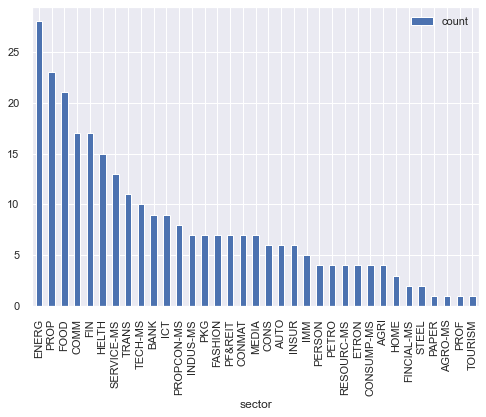

In [12]:
#plot bar by sector
df3 = df_q2_p.groupby( ['sector'] ).size().reset_index(name='count')
df3 = df3.sort_values('count',ascending = False).reset_index(drop =True)
display(df3)
sector_list = [i for i in df3['sector']]
count_list = [i for i in df3['count']]
print(sector_list)
print(count_list)
#df3 = pd.DataFrame({'count' :count_list},index =sector_list)
#display(df3)
df3.info()

#df3 = pd.DataFrame({'count' : count_list}, index =sector_list)
fig = plt.figure(figsize =(30,30) ,dpi =300)
ax= df3.plot.bar(x='sector',y='count',style='o',rot=90) #****

<Figure size 3000x3000 with 0 Axes>

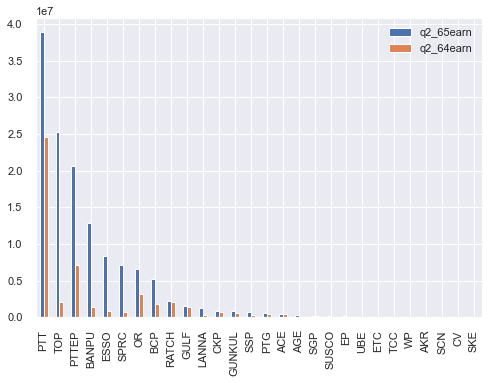

<Figure size 3000x3000 with 0 Axes>

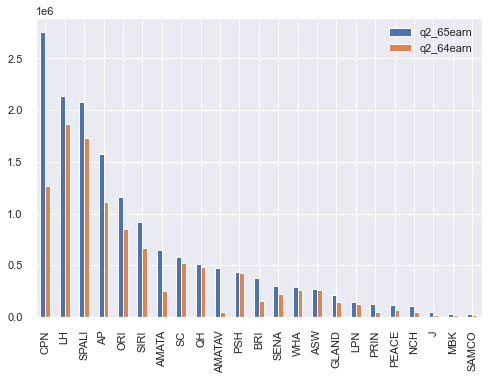

In [13]:
## test
df_energ = df_q2_p[ (df_q2_p['sector'] == 'ENERG') ][ ['company','q2_65earn','q2_64earn'] ].reset_index(drop =True) #target แล้ว match มั่ว
df_prop = df_q2_p[ (df_q2_p['sector'] == 'PROP') ][ ['company','q2_65earn','q2_64earn'] ].reset_index(drop =True)
df_Food = df_q2_p[ (df_q2_p['sector'] == 'PROP') ][ ['company','q2_65earn','q2_64earn'] ].reset_index(drop =True)
#display(df_ex)

type1 = [i for i in df_energ['q2_65earn']]
type2 = [i for i in df_energ['q2_64earn']]
index =[i for i in df_energ['company']]
#print(type1)
#print(type2)
#print(index)
df_energ =pd.DataFrame({'q2_65earn' : type1,'q2_64earn':type2}, index =index)
fig =plt.figure(figsize =(100,100) ,dpi =30)
ax = df_energ.plot.bar(rot=90)

type1 = [i for i in df_prop['q2_65earn']]
type2 = [i for i in df_prop['q2_64earn']]
index =[i for i in df_prop['company']]
df_prop =pd.DataFrame({'q2_65earn' : type1,'q2_64earn':type2}, index =index)
fig =plt.figure(figsize =(100,100) ,dpi =30)
ax = df_prop.plot.bar(rot=90)

C:\Users\USER\AppData\Local\Temp/ipykernel_20180/1258776933.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig =plt.figure(figsize =(30,30) ,dpi = 10)


<Figure size 300x300 with 0 Axes>

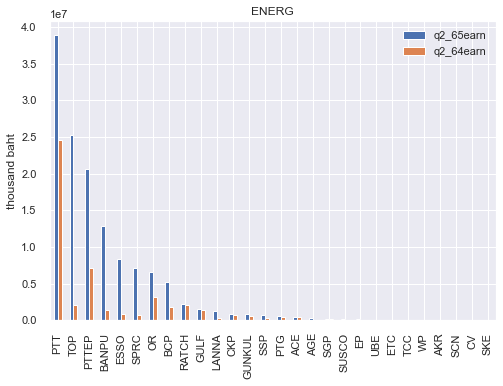

<Figure size 300x300 with 0 Axes>

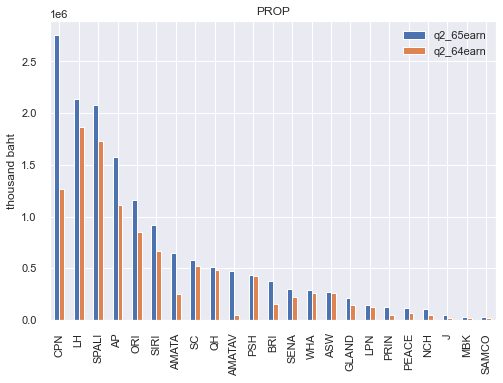

<Figure size 300x300 with 0 Axes>

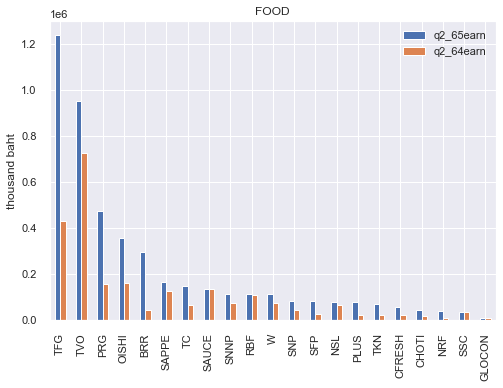

<Figure size 300x300 with 0 Axes>

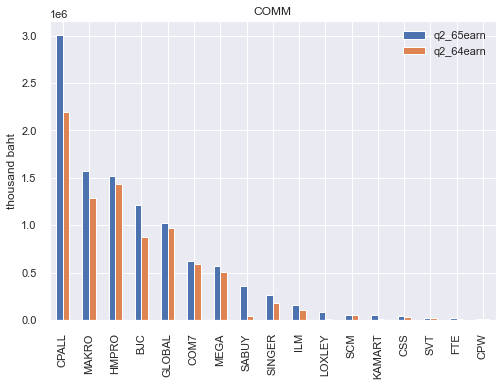

<Figure size 300x300 with 0 Axes>

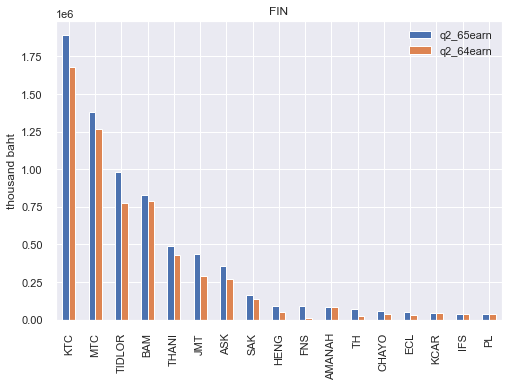

<Figure size 300x300 with 0 Axes>

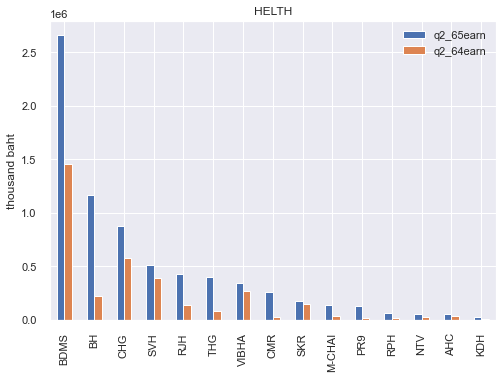

<Figure size 300x300 with 0 Axes>

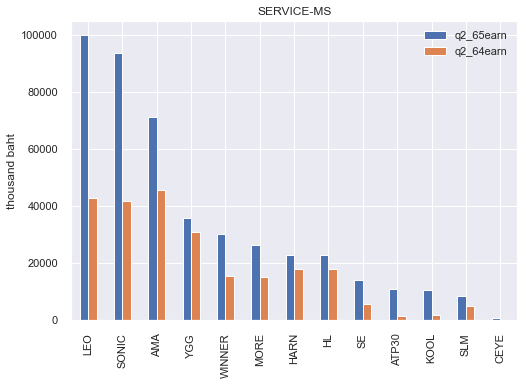

<Figure size 300x300 with 0 Axes>

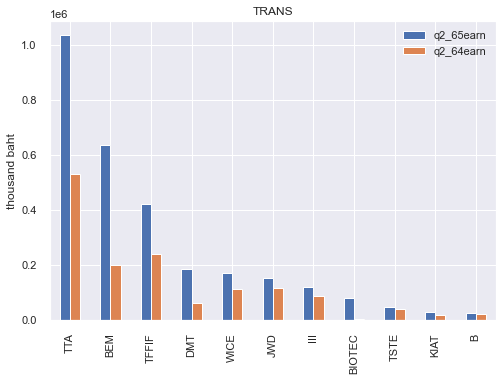

<Figure size 300x300 with 0 Axes>

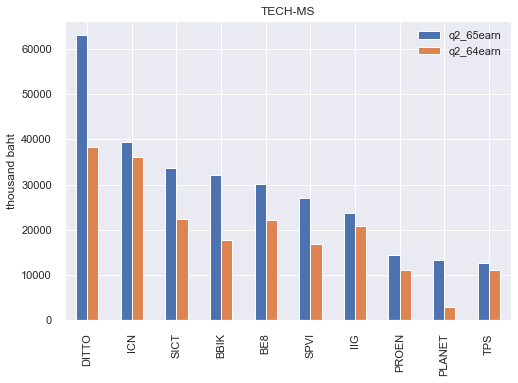

<Figure size 300x300 with 0 Axes>

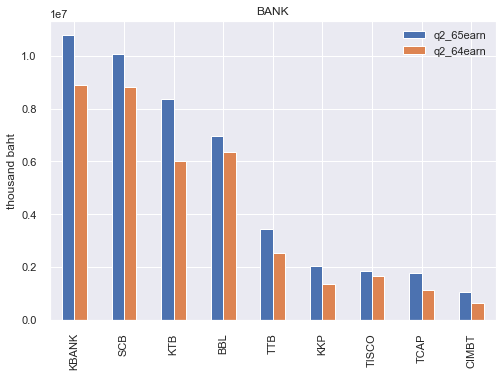

<Figure size 300x300 with 0 Axes>

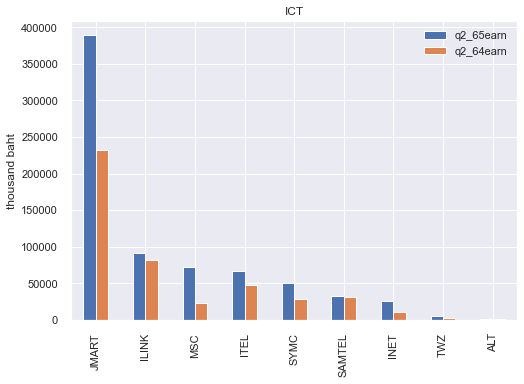

<Figure size 300x300 with 0 Axes>

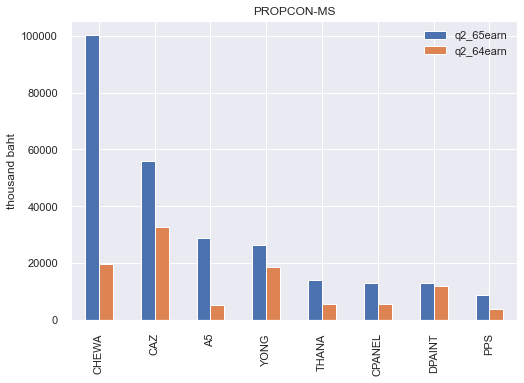

<Figure size 300x300 with 0 Axes>

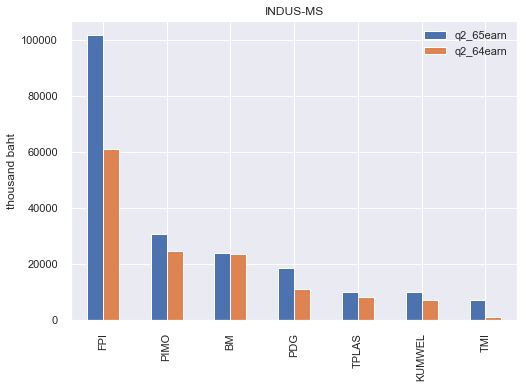

<Figure size 300x300 with 0 Axes>

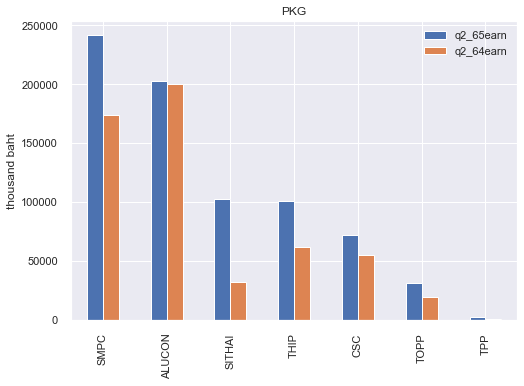

<Figure size 300x300 with 0 Axes>

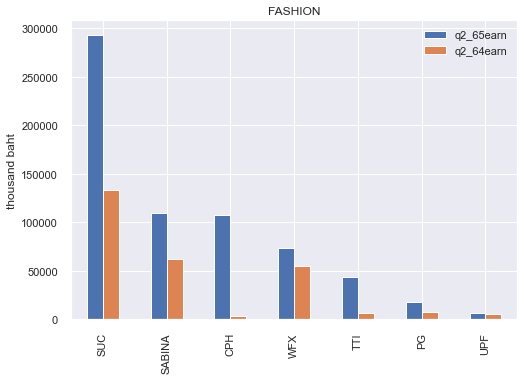

<Figure size 300x300 with 0 Axes>

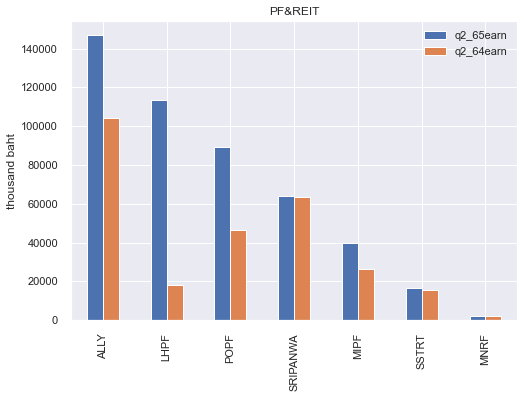

<Figure size 300x300 with 0 Axes>

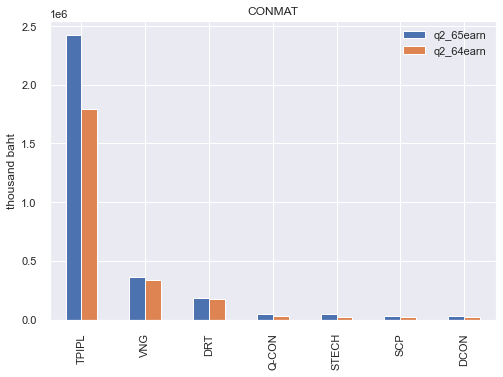

<Figure size 300x300 with 0 Axes>

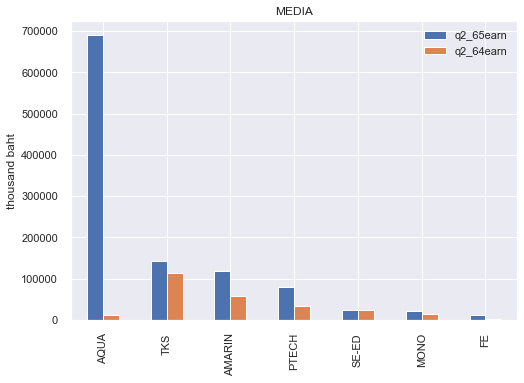

<Figure size 300x300 with 0 Axes>

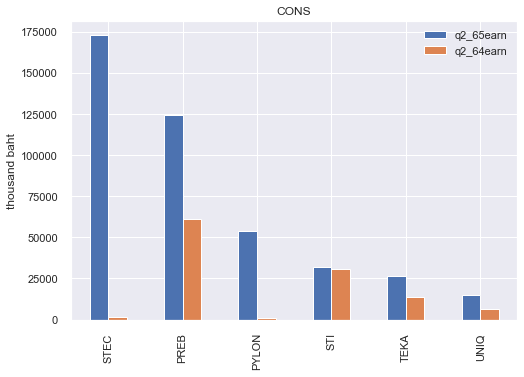

<Figure size 300x300 with 0 Axes>

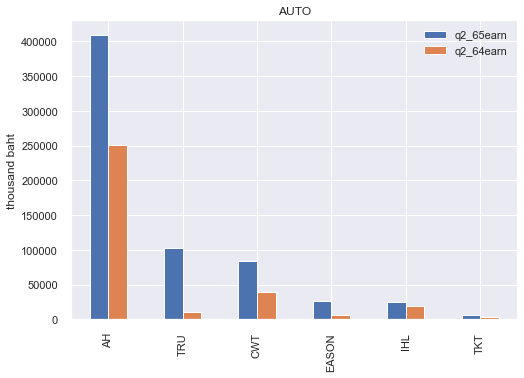

<Figure size 300x300 with 0 Axes>

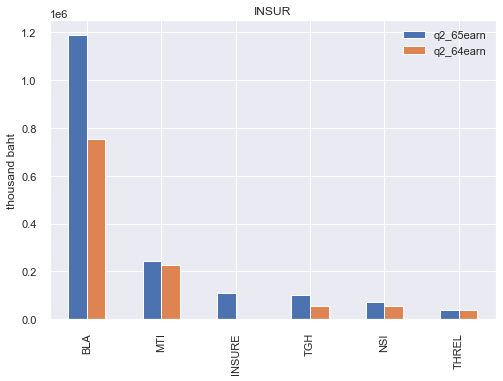

<Figure size 300x300 with 0 Axes>

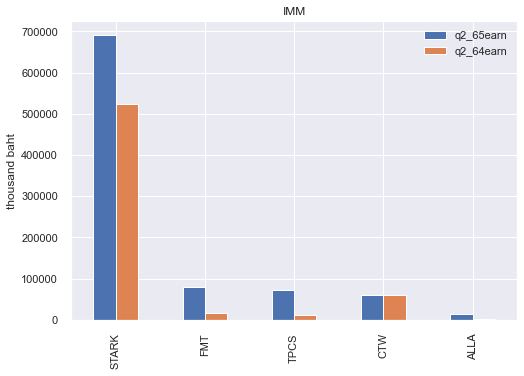

<Figure size 300x300 with 0 Axes>

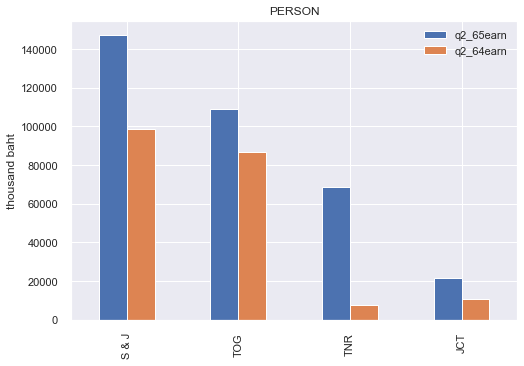

<Figure size 300x300 with 0 Axes>

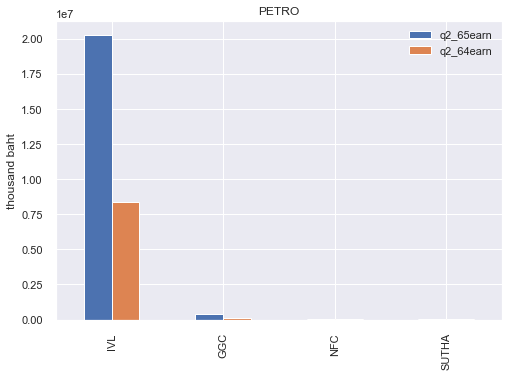

<Figure size 300x300 with 0 Axes>

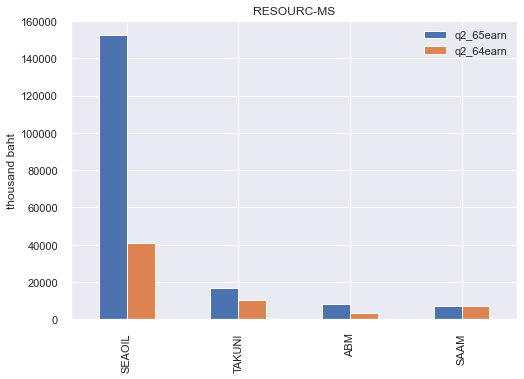

<Figure size 300x300 with 0 Axes>

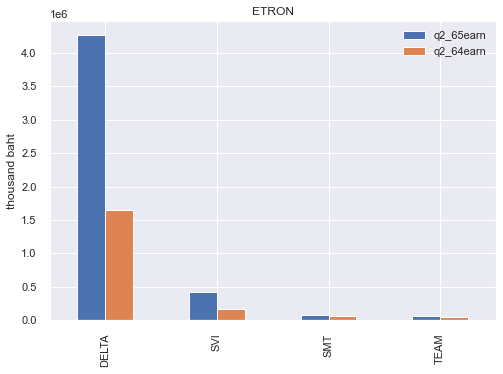

<Figure size 300x300 with 0 Axes>

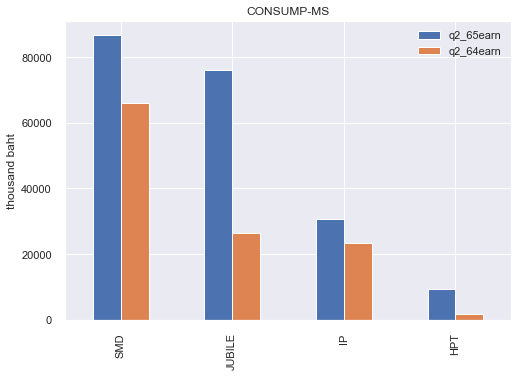

<Figure size 300x300 with 0 Axes>

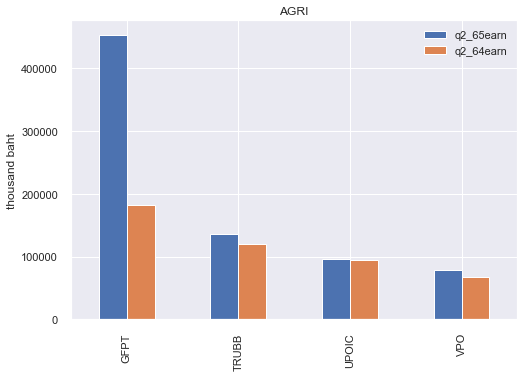

<Figure size 300x300 with 0 Axes>

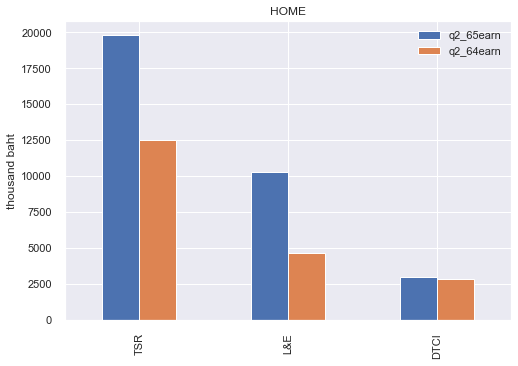

<Figure size 300x300 with 0 Axes>

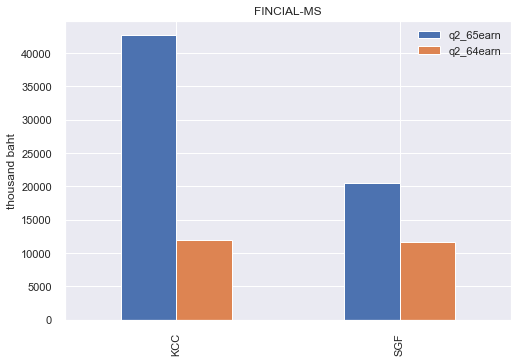

<Figure size 300x300 with 0 Axes>

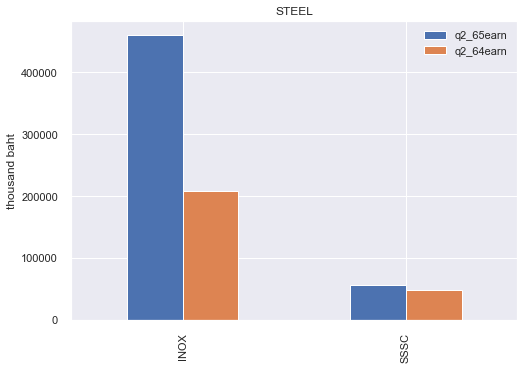

<Figure size 300x300 with 0 Axes>

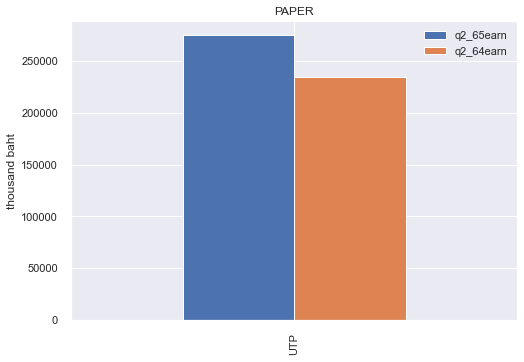

<Figure size 300x300 with 0 Axes>

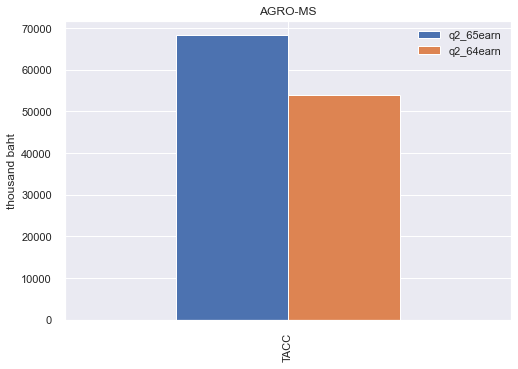

<Figure size 300x300 with 0 Axes>

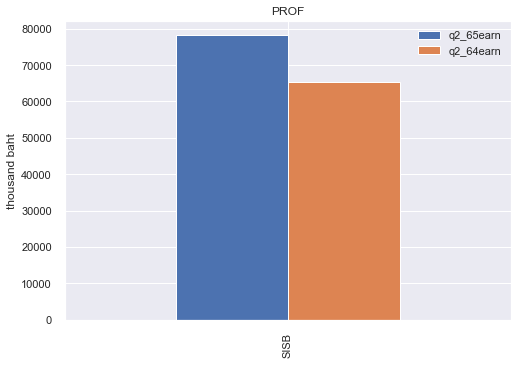

<Figure size 300x300 with 0 Axes>

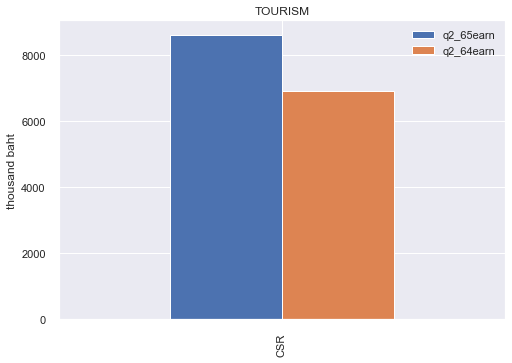

In [14]:
# for loop 
sector_list = [i for i in df3['sector']]
for i in sector_list:
    
    dfx = df_q2_p[ (df_q2_p['sector'] == i) ][ ['company','q2_65earn','q2_64earn'] ].reset_index(drop =True) #target แล้ว match มั่ว
    
    #display(df_ex)

    type1 = [x for x in dfx['q2_65earn']]
    type2 = [i for i in dfx['q2_64earn']]
    index =[i for i in dfx['company']]
    #print(type1)
    #print(type2)
    #print(index)
    dfx =pd.DataFrame({'q2_65earn' : type1,'q2_64earn':type2}, index =index)
    fig =plt.figure(figsize =(30,30) ,dpi = 10)
    ax = dfx.plot.bar(rot=90)
    ax.set_ylabel('thousand baht')
    ax.set_title(i)

In [15]:
# Q2 Visualize earning growth between Q2/65 and Q2/64
df_q2_g = df_q2.iloc[:,0:3]
df_6m_g = df_6m.iloc[:,2:3]
display(df_q2_g)
display(df_6m_g)


,sector,company,q2_65epsg
0,ENERG,PTT,0.580548
1,ENERG,TOP,10.931606
2,ENERG,PTTEP,1.885306
3,PETRO,IVL,1.431512
4,ENERG,BANPU,8.648787
...,...,...,...
763,TRANS,BA,0.000000
764,TRANS,AOT,0.000000
765,INSUR,SMK,0.000000
766,TRANS,THAI,0.000000


,6m_65epsg
0,0.126865
1,4.929509
2,0.666497
3,1.393837
4,7.058996
...,...
763,0.000000
764,0.000000
765,0.000000
766,0.000000


In [16]:
# filter case q2_65epsg > 0.0 & 6m_65epsg >= mean

df_2 = pd.concat( [df_q2_g, df_6m_g], ignore_index=False,axis =1 )
df_2.info()


#dont forget ()
df_2 = df_2.loc[ (df_2['q2_65epsg'] > 0.0) & (df_2['6m_65epsg'] >= df['6m_65epsg'].mean()) ,['sector','company','q2_65epsg','6m_65epsg']].reset_index(drop=True)
df_2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     765 non-null    object 
 1   company    765 non-null    object 
 2   q2_65epsg  765 non-null    float32
 3   6m_65epsg  765 non-null    float64
dtypes: float32(1), float64(1), object(2)
memory usage: 26.9+ KB


,sector,company,q2_65epsg,6m_65epsg
0,ENERG,TOP,10.931606,4.929509
1,PETRO,IVL,1.431512,1.393837
2,ENERG,BANPU,8.648787,7.058996
3,ENERG,ESSO,8.670739,2.893662
4,ENERG,SPRC,8.252522,3.476439
...,...,...,...,...
95,SERVICE-MS,SLM,0.656002,2.209909
96,RESOURC-MS,SAAM,0.033828,2.907710
97,INDUS-MS,TMI,6.587673,6.174884
98,ICT,TWZ,1.576020,0.879907


,sector,count
0,ENERG,12
1,HELTH,11
2,FOOD,10
3,SERVICE-MS,6
4,PROP,6
5,AGRI,3
6,TECH-MS,3
7,RESOURC-MS,3
8,PROPCON-MS,3
9,PETRO,3


C:\Users\USER\AppData\Local\Temp/ipykernel_20180/251600191.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig =plt.figure(figsize =(30,30) ,dpi = 10)


<Figure size 300x300 with 0 Axes>

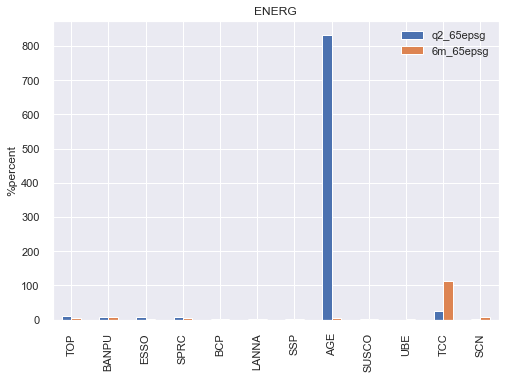

<Figure size 300x300 with 0 Axes>

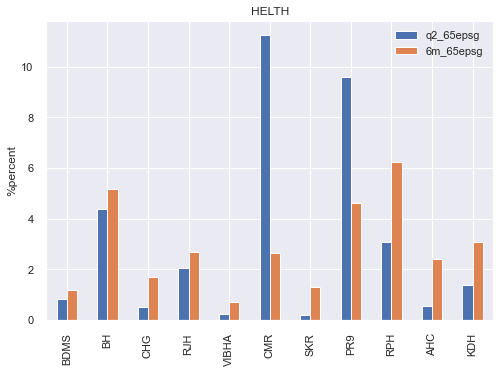

<Figure size 300x300 with 0 Axes>

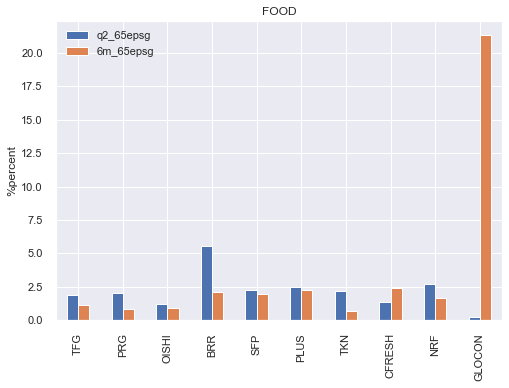

<Figure size 300x300 with 0 Axes>

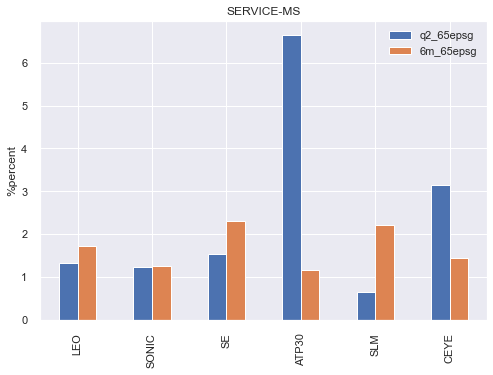

<Figure size 300x300 with 0 Axes>

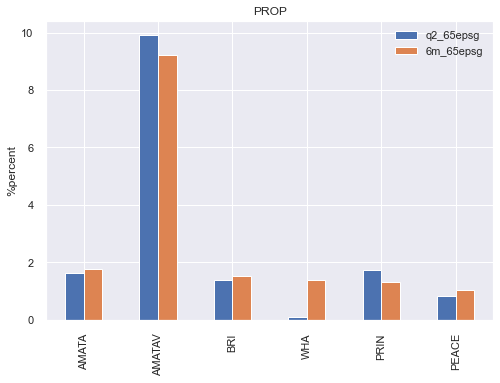

<Figure size 300x300 with 0 Axes>

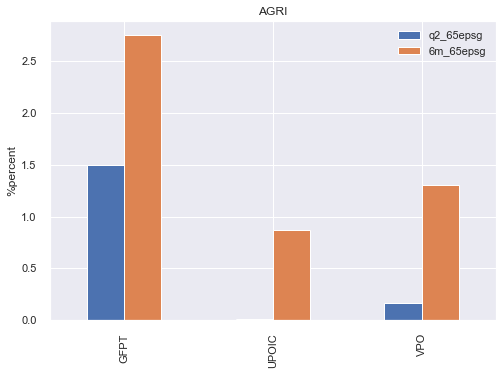

<Figure size 300x300 with 0 Axes>

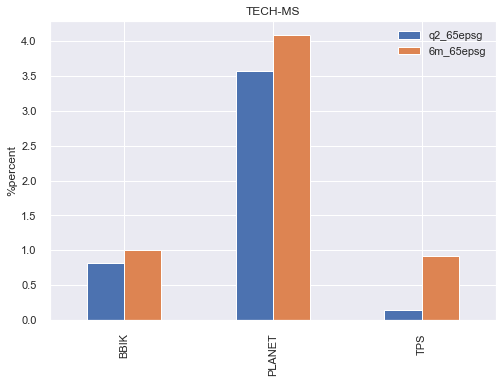

<Figure size 300x300 with 0 Axes>

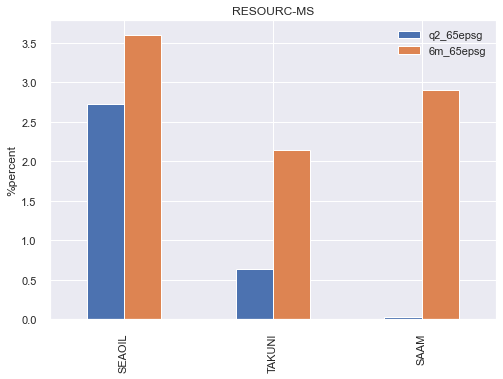

<Figure size 300x300 with 0 Axes>

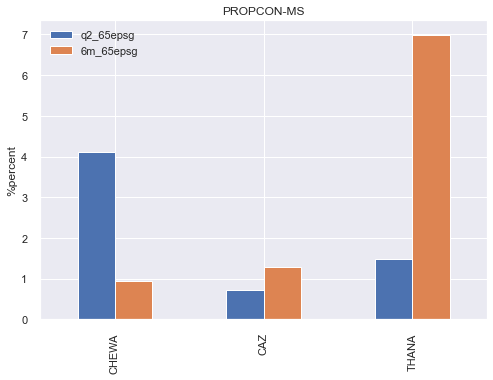

<Figure size 300x300 with 0 Axes>

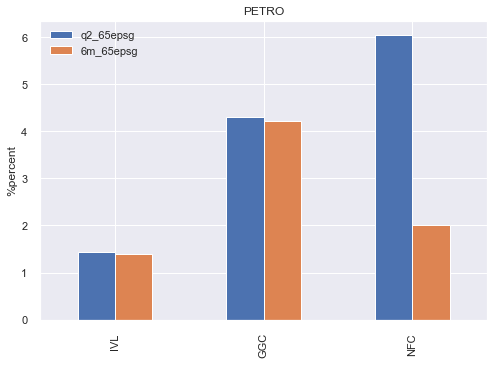

<Figure size 300x300 with 0 Axes>

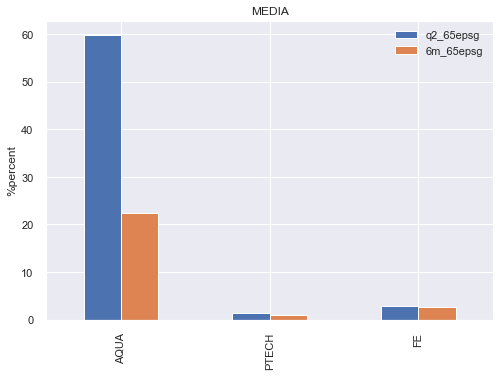

<Figure size 300x300 with 0 Axes>

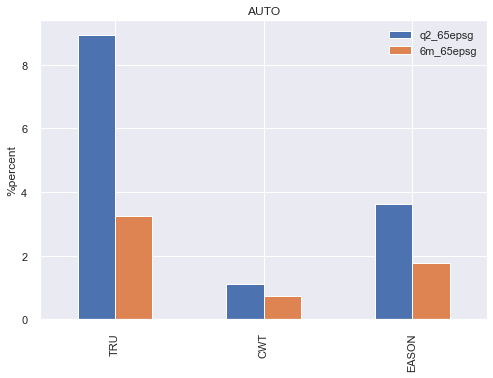

<Figure size 300x300 with 0 Axes>

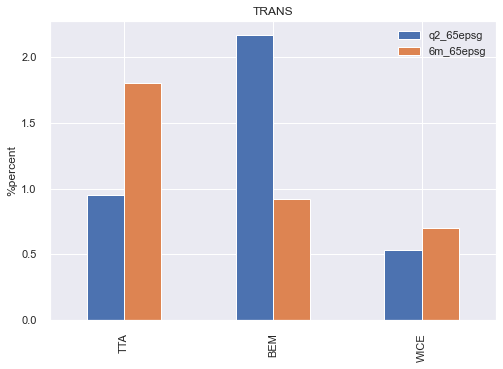

<Figure size 300x300 with 0 Axes>

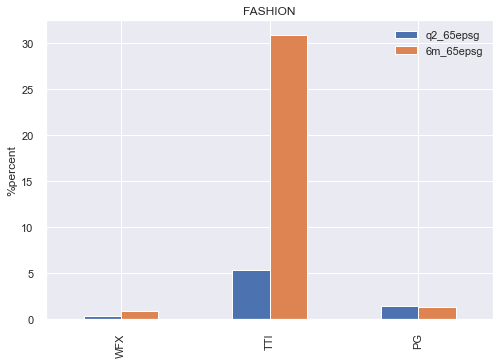

<Figure size 300x300 with 0 Axes>

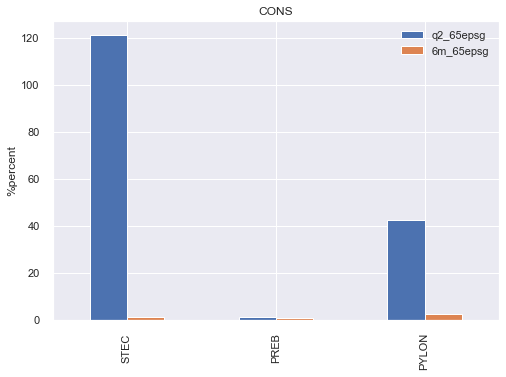

<Figure size 300x300 with 0 Axes>

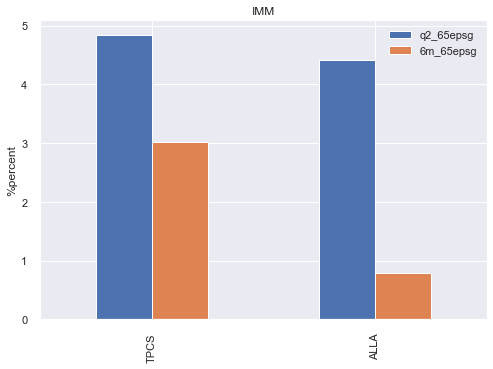

<Figure size 300x300 with 0 Axes>

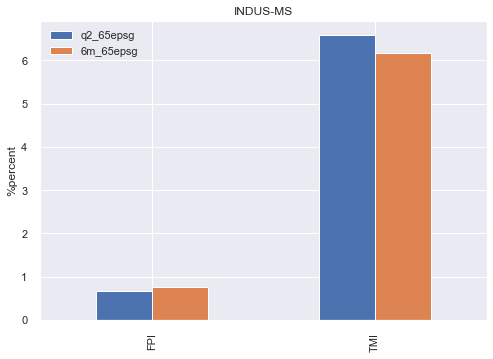

<Figure size 300x300 with 0 Axes>

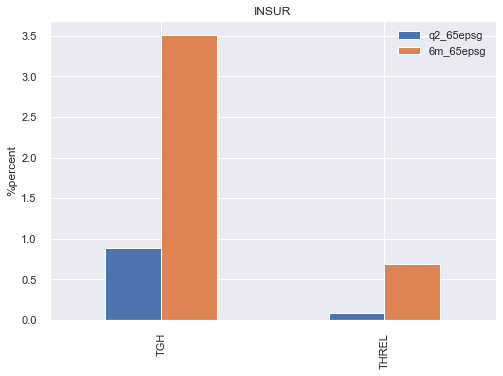

<Figure size 300x300 with 0 Axes>

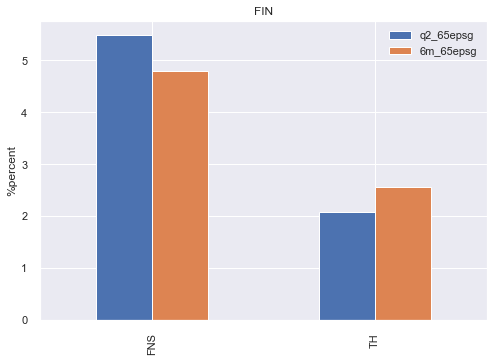

<Figure size 300x300 with 0 Axes>

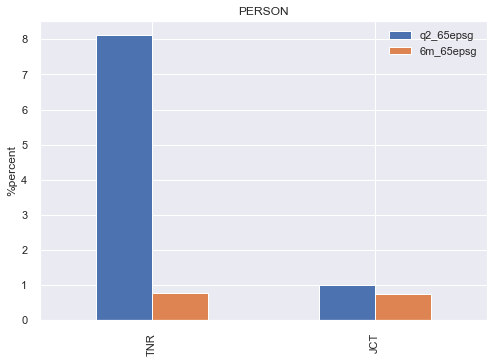

<Figure size 300x300 with 0 Axes>

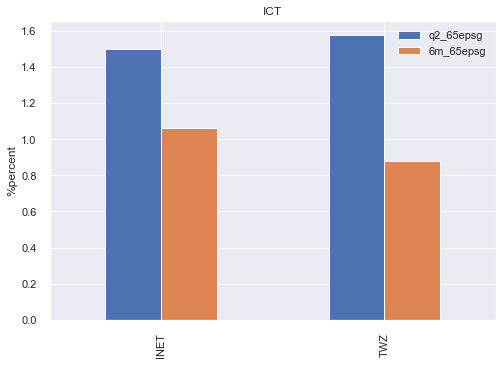

<Figure size 300x300 with 0 Axes>

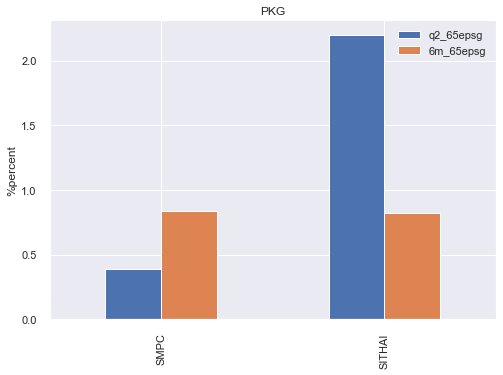

<Figure size 300x300 with 0 Axes>

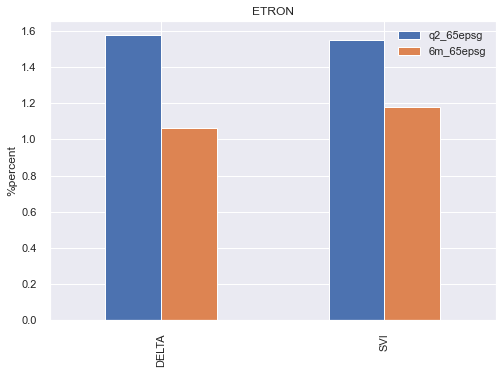

<Figure size 300x300 with 0 Axes>

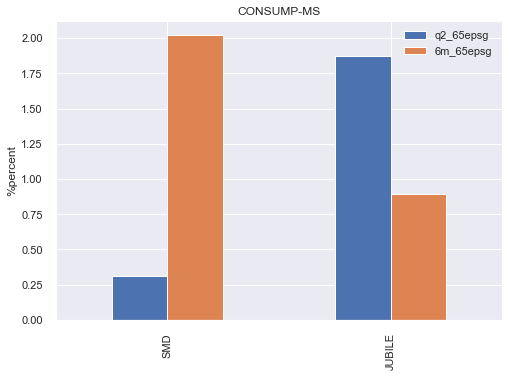

<Figure size 300x300 with 0 Axes>

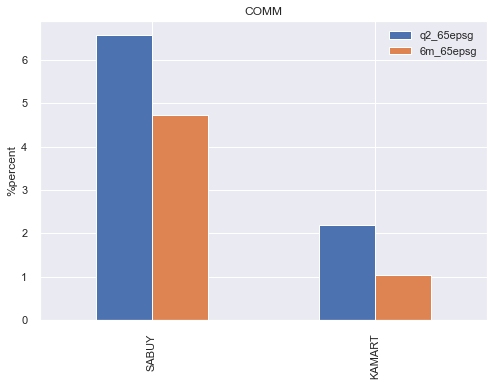

<Figure size 300x300 with 0 Axes>

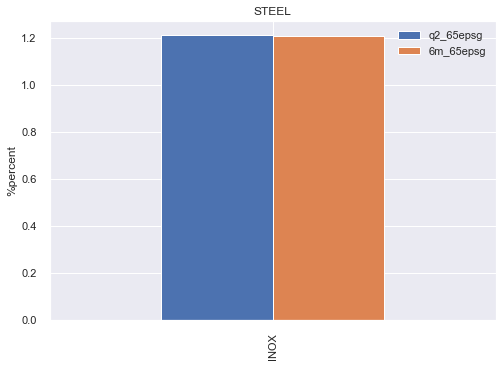

<Figure size 300x300 with 0 Axes>

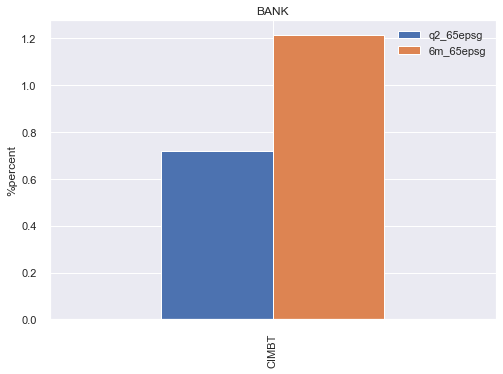

<Figure size 300x300 with 0 Axes>

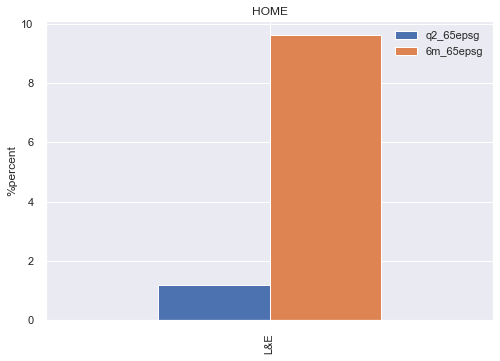

<Figure size 300x300 with 0 Axes>

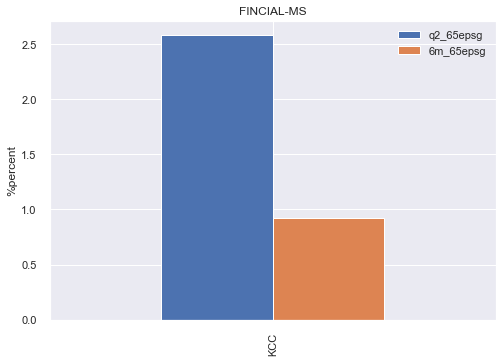

<Figure size 300x300 with 0 Axes>

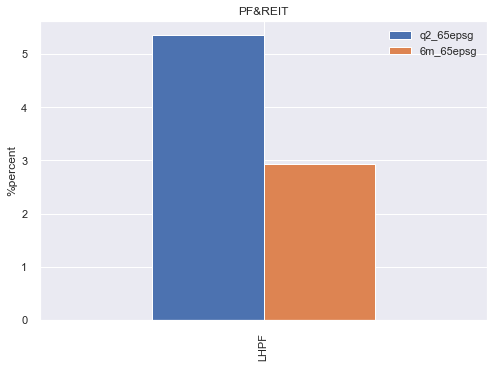

In [17]:
# built list that fit for dfxx
df_3 = df_2.groupby( ['sector'] ).size().reset_index(name='count')
df_3 = df_3.sort_values('count',ascending = False).reset_index(drop =True)
display(df_3)
sector_list2 = [i for i in df_3['sector']]
for i in sector_list2:
    
    dfxx = df_2[ (df_2['sector'] == i) ][ ['company','q2_65epsg','6m_65epsg'] ].reset_index(drop =True) #target แล้ว match มั่ว
    
    #display(dfxx)

    type1 = [x for x in dfxx['q2_65epsg']]
    type2 = [i for i in dfxx['6m_65epsg']]
    index =[i for i in dfxx['company']]
    #print(type1)
    #print(type2)
    #print(index)
    dfxx =pd.DataFrame({'q2_65epsg' : type1,'6m_65epsg':type2}, index =index)
    fig =plt.figure(figsize =(30,30) ,dpi = 10)
    ax = dfxx.plot.bar(rot=90)
    ax.set_ylabel('%percent')
    ax.set_title(i)
    
    

<Figure size 9000x9000 with 0 Axes>

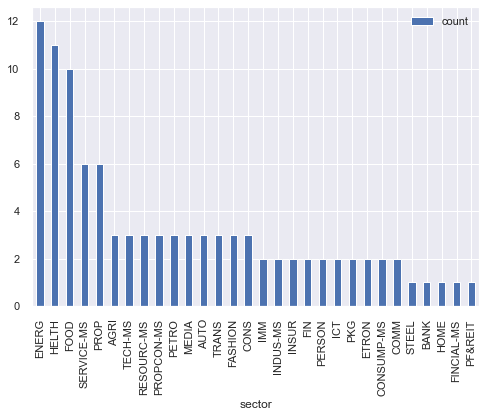

In [18]:
#plot bar by sector

sector_listx = [i for i in df_3['sector']]
count_listx = [i for i in df_3['count']]
#print(sector_listx)
#print(count_listx)

fig = plt.figure(figsize =(30,30) ,dpi =300)
ax= df_3.plot.bar(x='sector',y='count',style='o',rot=90)

In [19]:
# Q3
# filter case q2_65epsg negative
df_q2_n = df.loc[ df_q2['q2_65epsg'] <= 0.0,['sector','company','q2_65epsg','q2_65earn','q2_65eps','q2_64earn','q2_64eps']].reset_index(drop=True)
df_q2_n

,sector,company,q2_65epsg,q2_65earn,q2_65eps,q2_64earn,q2_64eps
0,CONMAT,SCC,-0.420081,9937631,8.28,17136230.0,14.28
1,BANK,BAY,-0.461331,7833750,1.06,14542797.0,1.98
2,ICT,ADVANC,-0.104486,6305150,2.12,7040817.0,2.37
3,FOOD,CPF,-0.111706,4208112,0.51,4737296.0,0.57
4,ENERG,IRPC,-0.162022,3833043,0.19,4574157.0,0.22
...,...,...,...,...,...,...,...
479,TRANS,BA,0.000000,-847507,-0.4,-685969.0,-0.33
480,TRANS,AOT,0.000000,-2207195,-0.15,-4078474.0,-0.29
481,INSUR,SMK,0.000000,-3132180,-15.66,-359435.0,-1.8
482,TRANS,THAI,0.000000,-3220566,-1.48,23327503.0,10.69


In [20]:
# add logic q2_65eps - q2_64_eps = positive
df_q3= df_q2_n.groupby('sector')[['company','q2_65eps','q2_64eps']].apply(lambda x: (x['q2_65eps'] - x['q2_64eps']).to_frame('q2_sub') ) 
display(df_q3)
df_q3cat = pd.concat( [df_q2_n, df_q3], ignore_index=False,axis =1 )
df_q3cat
df_subp = df_q3cat.loc[ df_q3cat['q2_sub'] > 0.0 ,['sector','company','q2_sub']].reset_index(drop=True)
df_subp = df_subp.sort_values('q2_sub',ascending = False).reset_index(drop =True)
## select row 30 top
df_subp2 = df_subp.iloc[0:31]
df_subp2

,q2_sub
0,-6.0
1,-0.92
2,-0.25
3,-0.06
4,-0.03
...,...
479,-0.07
480,0.14
481,-13.86
482,-12.17


,sector,company,q2_sub
0,TOURISM,OHTL,7.26
1,HELTH,NEW,2.14
2,FOOD,MINT,1.06
3,FASHION,BTNC,0.98
4,TOURISM,LRH,0.89
5,INSUR,CHARAN,0.83
6,PF&REIT,FUTUREPF,0.7316
7,FOOD,M,0.59
8,FASHION,WACOAL,0.57
9,TOURISM,SHANG,0.52


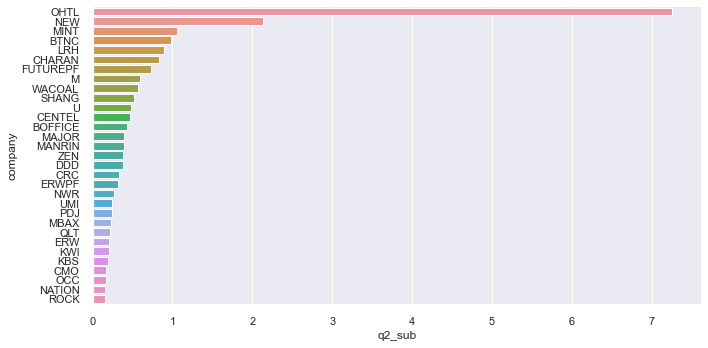

In [21]:
sns.catplot(data=df_subp2, kind='bar',
            x='q2_sub',  # axis to show the categories
            y='company',  # quantitative values
            height= 5, aspect= 2 )

In [22]:
# filter again with q2_65_eps are positive
df_inner = pd.merge( df_subp2, df_q2_n, left_on='company', right_on='company' )
df_inner = df_inner.loc[(df_inner['q2_65eps'] > 0.0) ,['sector_x','company','q2_65eps','q2_64eps','q2_sub']].reset_index(drop=True)
df_inner = df_inner.sort_values('q2_65eps',ascending = False).reset_index(drop =True)
df_inner

,sector_x,company,q2_65eps,q2_64eps,q2_sub
0,HELTH,NEW,2.1,-0.04,2.14
1,INSUR,CHARAN,0.55,-0.28,0.83
2,FASHION,BTNC,0.49,-0.49,0.98
3,FOOD,M,0.48,-0.11,0.59
4,PF&REIT,FUTUREPF,0.3743,-0.3573,0.7316
5,COMM,CRC,0.25,-0.08,0.33
6,PF&REIT,ERWPF,0.2486,-0.0747,0.3233
7,CONMAT,UMI,0.231,-0.008,0.239
8,FOOD,MINT,0.23,-0.83,1.06
9,INDUS-MS,MBAX,0.22,-0.01,0.23


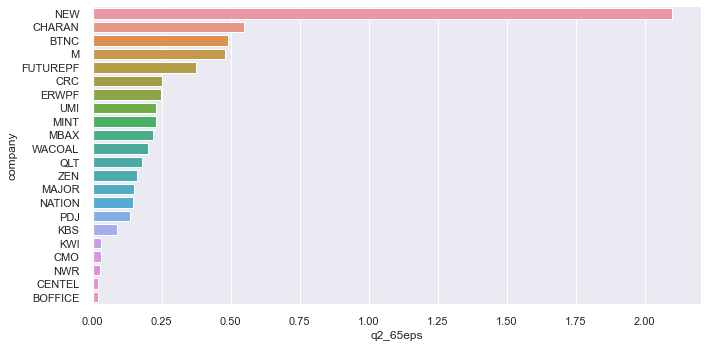

In [23]:
sns.catplot(data=df_inner, kind='bar',
            x='q2_65eps',  # axis to show the categories
            y='company',  # quantitative values
            height= 5, aspect= 2 )

In [24]:
#Q4 เรียงลำดับบริษัท โดย เทียบจาก ขนาดของ ผลรวม earning Q2 ปี65 และ 64 และ ผลรวม earning 6 เดือน ของปี 65 และปี 64 
# ใดยใช้ earn 6 เดือน เป็นฐานในการเปรียบเทียบ % เปลี่ยนแปลง
## (df_inner['q2_65earn'] > 0.0 )
dfn = df_q2.iloc[:,0:2]
dfn['earnsum'] = df_q2['q2_65earn'] + df_q2['q2_64earn']
dfn['6m_earnsum'] = df_6m['6m_65earn'] + df_6m['6m_64earn']
df4 = dfn
df4

# filter .mean
df4 = df4.loc[(df4['earnsum'] >= df4['earnsum'].mean()) & (df4['6m_earnsum'] >= df4['6m_earnsum'].mean()),['sector','company','earnsum','6m_earnsum']  ].reset_index(drop = True)
df4

,sector,company,earnsum,6m_earnsum
0,ENERG,PTT,63426416.0,121584973.0
1,ENERG,TOP,27449612.0,37992284.0
2,ENERG,PTTEP,27739548.0,49792254.0
3,PETRO,IVL,28617496.0,48696208.0
4,ENERG,BANPU,14114499.0,25913809.0
...,...,...,...,...
97,STEEL,GJS,1092875.0,1803837.0
98,ETRON,HANA,981735.0,1647925.0
99,ENERG,SUPER,944055.0,2336598.0
100,ENERG,BGRIM,828808.0,1463074.0


In [25]:
df4group = df4.groupby('sector')
result = df4group[['earnsum','6m_earnsum']].agg(['mean','median','min','max','std']) 
result.reset_index(inplace=True)
#result.sort_values(df4group[earnsum['mean']],ascending = False)
display( result )

sector       earnsum                                                    \
                    mean      median         min         max           std   
0     AGRI  3.503438e+06   3503438.5    821044.0   6185833.0  3.793479e+06   
1     BANK  1.060378e+07   9645136.0   1667912.0  22376548.0  7.987658e+06   
2     COMM  2.070807e+06   2000778.0    916687.0   5193722.0  1.293164e+06   
3   CONMAT  6.223770e+06   2127151.5    885874.0  27073860.0  1.029499e+07   
4    ENERG  8.436052e+06   2611647.5    828808.0  63426416.0  1.393014e+07   
5    ETRON  2.696773e+06   1189741.0    981735.0   5918842.0  2.792331e+06   
6      FIN  2.111954e+06   1953275.0    919941.0   3573714.0  9.181512e+05   
7     FOOD  2.975255e+06   1679853.0   1423484.0   8945408.0  2.780845e+06   
8    HELTH  1.854752e+06   1418368.0    901583.0   4116314.0  1.212739e+06   
9      ICT  6.127350e+06   5448766.0   2534563.0  13345967.0  4.258592e+06   
10     IMM  1.215082e+06   1215082.0   1215082.0   1215082.0           NaN   
11   INSUR  2.553599e+06   1940522.0   1074659.0   4645616.0  1.862748e+06   
12  PERSON  7.896556e+06   7896556.0   7896556.0   7896556.0           NaN   
13   PETRO  2.752025e+07  27520246.0  26422996.0  28617496.0  1.551746e+06   
14     PKG  4.119193e+06   4119193.0   4119193.0   4119193.0           NaN   
15    PROP  2.196324e+06   1793370.0    857344.0   4022000.0  1.332860e+06   
16   STEEL  1.092875e+06   1092875.0   1092875.0   1092875.0           NaN   
17   TRANS  7.502144e+06   1564984.0    834509.0  20106938.0  1.092218e+07   

      6m_earnsum                                                     
            mean      median         min          max           std  
0   7.654894e+06   7654893.5   1656432.0   13653355.0  8.483106e+06  
1   2.069016e+07  19654145.5   3070273.0   41525648.0  1.538646e+07  
2   4.014705e+06   2620237.0   1710517.0   11245802.0  2.894825e+06  
3   1.144609e+07   3379170.5   1913316.0   50831322.0  1.940667e+07  
4   1.548122e+07   5517955.5   1463074.0  121584973.0  2.569993e+07  
5   4.795500e+06   2282835.0   1647925.0   10455741.0  4.912181e+06  
6   4.060575e+06   4013576.0   1801872.0    6954793.0  1.968652e+06  
7   5.905447e+06   3177192.0   2732078.0   18732922.0  5.901838e+06  
8   3.788785e+06   2630546.0   1902419.0    8898012.0  2.703399e+06  
9   1.191926e+07  10661618.0   4083133.0   26300695.0  8.591893e+06  
10  2.222951e+06   2222951.0   2222951.0    2222951.0           NaN  
11  5.718655e+06   3730923.0   1678180.0   11746862.0  5.320517e+06  
12  1.900030e+07  19000299.0  19000299.0   19000299.0           NaN  
13  4.451287e+07  44512870.0  40329532.0   48696208.0  5.916133e+06  
14  7.911882e+06   7911882.0   7911882.0    7911882.0           NaN  
15  4.282064e+06   2918180.0   1635088.0   10184916.0  2.951182e+06  
16  1.803837e+06   1803837.0   1803837.0    1803837.0           NaN  
17  2.955862e+06   2733948.0   1476015.0    4657622.0  1.602370e+06

In [26]:
df4 = df4.sort_values(['earnsum','6m_earnsum'],ascending = [False,False]).reset_index(drop =True)
df4
# Do standardization
tf = df4[['earnsum','6m_earnsum']].transform( lambda x: ((x - x.mean()) / x.std()) )
tf

,earnsum,6m_earnsum
0,6.489753,6.905362
1,2.577055,2.379649
2,2.478370,2.447703
3,2.445780,1.715035
4,2.403543,2.512220
...,...,...
97,-0.540118,-0.525133
98,-0.543325,-0.518809
99,-0.545892,-0.552285
100,-0.546533,-0.553089


In [27]:
# concat & sorted values
tf['%qvs6m'] = (tf['earnsum']/tf['6m_earnsum'])*100
tf
df5 = pd.concat( [df4, tf], ignore_index=False,axis =1 )
df5 = df5.drop( columns=['earnsum','6m_earnsum'] )
df5

df6 = df5.loc[df5['%qvs6m']>= 100.0,::].reset_index(drop =True)
df6 = df6.sort_values('%qvs6m',ascending = False).reset_index(drop =True)
df6 =df6.iloc[0:,:]
df6

,sector,company,%qvs6m
0,PROP,CPN,1625.134013
1,ETRON,DELTA,485.829476
2,ENERG,GULF,207.126978
3,HELTH,BDMS,193.552188
4,ENERG,BPP,152.455114
5,ENERG,TOP,142.608156
6,COMM,MAKRO,137.517960
7,PETRO,PTTGC,125.278867
8,BANK,KKP,120.337185
9,BANK,TISCO,119.499962


In [28]:
# group by sector and count
df_7 = df6.groupby( ['sector'] ).size().reset_index(name='count')
df_7 = df_7.sort_values('count',ascending = False).reset_index(drop =True)
display(df_7)

,sector,count
0,ENERG,11
1,COMM,7
2,FIN,5
3,HELTH,5
4,PROP,5
5,FOOD,4
6,BANK,3
7,CONMAT,2
8,ETRON,2
9,PETRO,2


,sector,count
0,ENERG,11
1,COMM,7
2,FIN,5
3,HELTH,5
4,PROP,5
5,FOOD,4
6,BANK,3
7,CONMAT,2
8,ETRON,2
9,PETRO,2


C:\Users\USER\AppData\Local\Temp/ipykernel_20180/3669820814.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig =plt.figure(figsize =(100,40) ,dpi = 10)


<Figure size 1000x400 with 0 Axes>

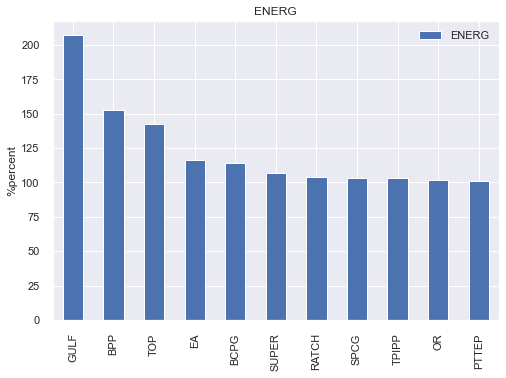

<Figure size 1000x400 with 0 Axes>

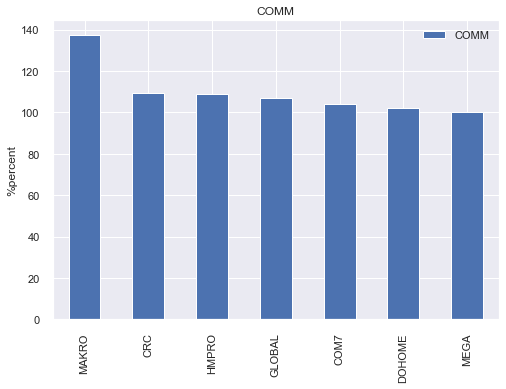

<Figure size 1000x400 with 0 Axes>

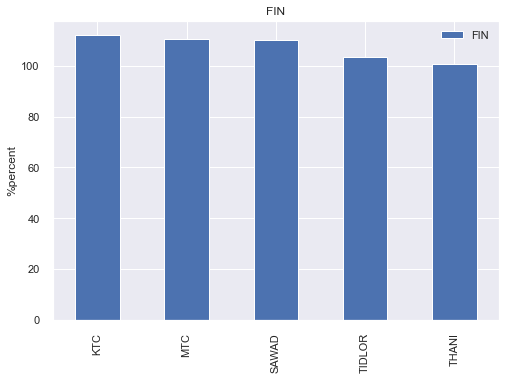

<Figure size 1000x400 with 0 Axes>

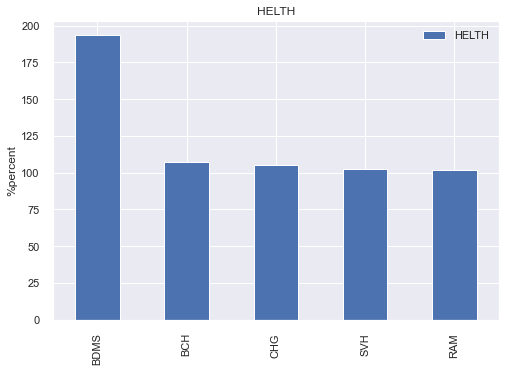

<Figure size 1000x400 with 0 Axes>

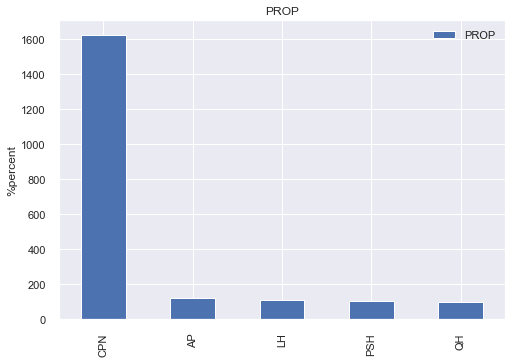

<Figure size 1000x400 with 0 Axes>

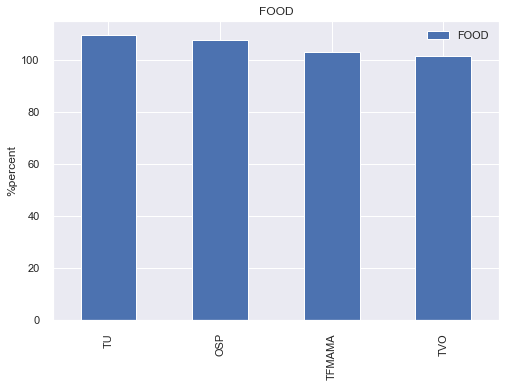

<Figure size 1000x400 with 0 Axes>

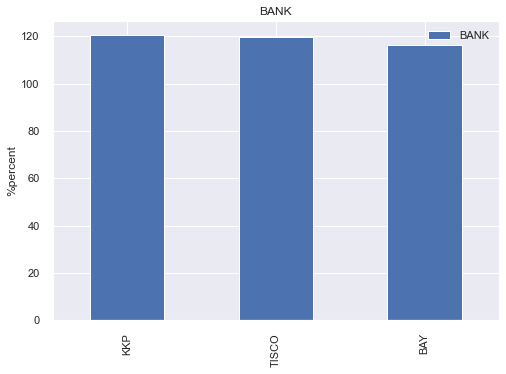

<Figure size 1000x400 with 0 Axes>

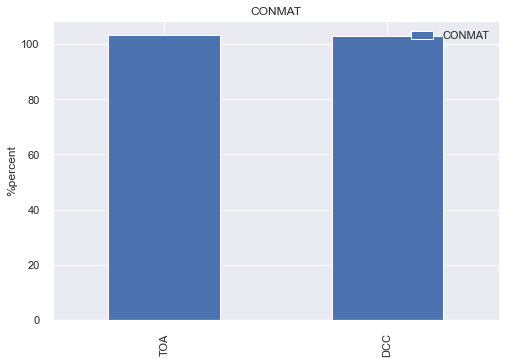

<Figure size 1000x400 with 0 Axes>

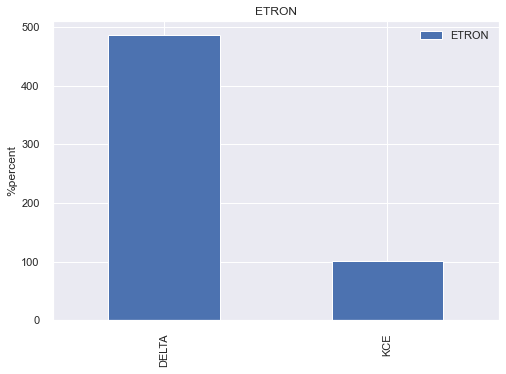

<Figure size 1000x400 with 0 Axes>

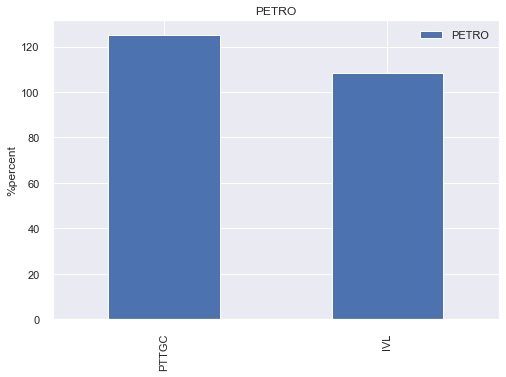

<Figure size 1000x400 with 0 Axes>

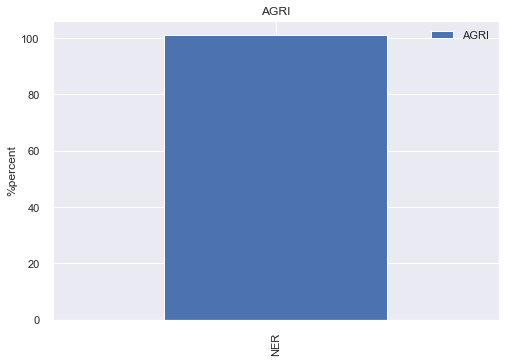

<Figure size 1000x400 with 0 Axes>

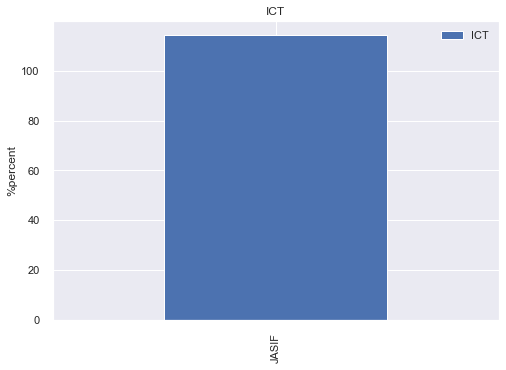

<Figure size 1000x400 with 0 Axes>

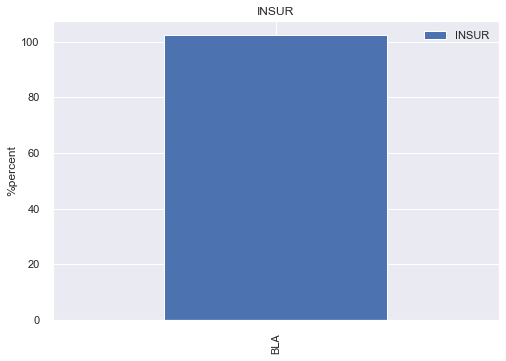

<Figure size 1000x400 with 0 Axes>

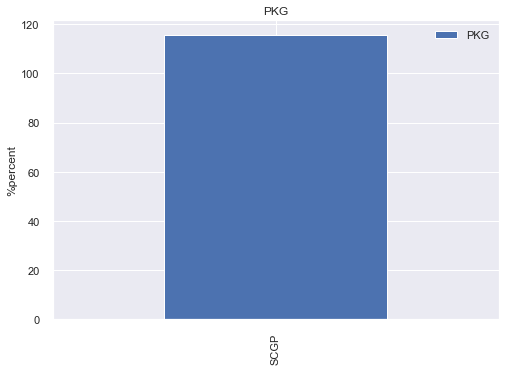

In [29]:
# for loop plot graph
df_7 = df6.groupby( ['sector'] ).size().reset_index(name='count')
df_7 = df_7.sort_values('count',ascending = False).reset_index(drop =True)
display(df_7)
sector_list3 = [i for i in df_7['sector']]
for i in sector_list3:
    
    dfxxx = df6[ (df6['sector'] == i) ][ ['company','%qvs6m'] ].reset_index(drop =True) #target แล้ว match มั่ว
    
    #display(dfxxx)

    type1 = [x for x in dfxxx['%qvs6m']]
    
    index =[j for j in dfxxx['company']]
    #print(type1)
    #print(index)
    dfxxx =pd.DataFrame({'%qvs6m' : type1}, index = index)
    fig =plt.figure(figsize =(100,40) ,dpi = 10)
   
    ax = dfxxx.plot.bar(rot=90)
    plt.legend({i}, ncol=2, loc='upper right')
    ax.set_ylabel('%percent')
    ax.set_title(i)